In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

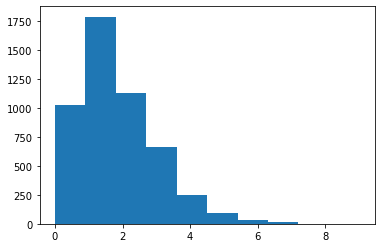

In [2]:
file = pd.read_csv('churn.csv')
plt.hist(file['number_customer_service_calls'], bins=10)
plt.show()

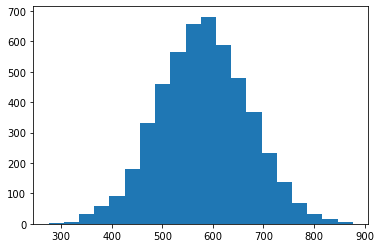

In [3]:
total_minutes = []
for i, j in enumerate(file['total_day_minutes']):
  total_minutes.append(file['total_eve_minutes'][i] + j + file['total_night_minutes'][i])
file['total_minutes'] = total_minutes
plt.hist(total_minutes, bins=20)
plt.show()

In [4]:
x = 0
y = 0
xy = 0
x2 = 0
y2 = 0
for i, j in enumerate(file['number_customer_service_calls']):
  y = y + j
  x = x + total_minutes[i]
  xy = xy + (j*total_minutes[i])
  y2 = y2 + (j*j)
  x2 = x2 + (total_minutes[i]*total_minutes[i])
n = len(file['number_customer_service_calls'])
a = (n*xy) - (x)*(y)
b = ((n*x2 - x2)*(n*y2 - y2)) ** .5
r = a/b
print('correlation is: '+str(r))

correlation is: -0.0010686094516627884


Коэффициент корреляции Пирсона: -0.01103210351461977


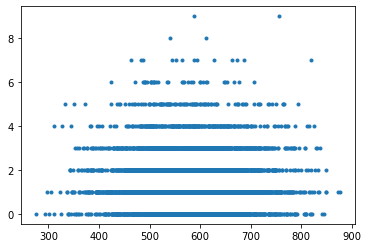

In [9]:
x = file['total_minutes']
y = file['number_customer_service_calls']
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

<Figure size 432x288 with 0 Axes>

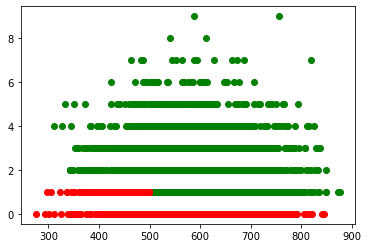

In [10]:
x = []
y = []
x1 = []
y1 = []
for i, j in enumerate(file['number_customer_service_calls']):
  if j*total_minutes[i] < 500:
    x1.append(total_minutes[i])
    y1.append(j)
  else:
    x.append(total_minutes[i])
    y.append(j)
plt.clf()
fig, ax = plt.subplots()
ax.scatter(x, y, color='g')
ax.scatter(x1, y1, color='r')
plt.show()

In [11]:
print(str(file.nlargest(5, 'total_minutes')))
print('\n')
print(str(file.nsmallest(5, 'total_minutes')))

     state  account_length  area_code phone_number international_plan  \
289     OK              89        510     352-6976                 no   
985     NY              64        415     345-9140                yes   
4271    MO             103        415     370-4667                 no   
3205    MS             111        408     345-3787                 no   
4991    AZ              97        510     410-3888                 no   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
289               no                      0              303.9   
985               no                      0              346.8   
4271             yes                     37              230.7   
3205              no                      0              294.7   
4991              no                      0              252.6   

      total_day_calls  total_day_charge  ...  total_eve_charge  \
289                95             51.66  ...             22.18   
985                55           

In [14]:
print((file['number_customer_service_calls'][0]+total_minutes[0])/(file['number_customer_service_calls'][4999]+total_minutes[4999]))
res = 0
for i, j in enumerate(file['total_day_minutes']):
  if not file['total_day_charge'][i]:
    continue
  res = res+(file['total_day_charge'][i]/j)
print(res/5000)

1.2846000362778889
0.16993525991392774


In [12]:
pd.get_dummies(file, columns=["state"]).head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df = file[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',           
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]
df.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [15]:
# выделяем churned как целевую переменную
X, y = file[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',           
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
    'total_intl_charge', 'number_customer_service_calls']], file['churned']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1155,0,131.6,120,22.37,211.3,96,17.96,168.3,97,7.57,11.1,4,3.00,4
2197,0,216.2,67,36.75,222.2,133,18.89,192.0,95,8.64,3.1,1,0.84,2
3001,0,119.0,82,20.23,187.5,108,15.94,189.3,97,8.52,11.5,3,3.11,1
4164,0,224.5,96,38.17,191.2,72,16.25,214.5,100,9.65,9.1,1,2.46,2
948,0,159.7,83,27.15,155.4,121,13.21,255.7,114,11.51,8.4,3,2.27,1


In [20]:
y_train.head()

1155     True
2197    False
3001    False
4164    False
948     False
Name: churned, dtype: bool

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
logistic = LogisticRegression()

In [23]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [24]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
svc_model=SVC()

In [26]:
svc_model.fit(X_train, y_train)

SVC()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
accuracy_score(y_test, logistic.predict(X_test))

0.853

In [29]:
precision_score(y_test, logistic.predict(X_test))

0.625

In [30]:
recall_score(y_test, logistic.predict(X_test))

0.12903225806451613

In [31]:
f1_score(y_test, logistic.predict(X_test))

0.21390374331550802

In [32]:
accuracy_score(y_test, tree.predict(X_test))

0.865

In [33]:
precision_score(y_test, tree.predict(X_test))

0.5588235294117647

In [34]:
recall_score(y_test, tree.predict(X_test))

0.6129032258064516

In [35]:
f1_score(y_test, tree.predict(X_test))

0.5846153846153845

In [36]:
accuracy_score(y_test, svc_model.predict(X_test))

0.908

In [37]:
precision_score(y_test, svc_model.predict(X_test))

0.9436619718309859

In [38]:
recall_score(y_test, svc_model.predict(X_test))

0.432258064516129

In [39]:
f1_score(y_test, svc_model.predict(X_test))

0.5929203539823008